In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1 - Importação das bibliotecas

In [2]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 2 - Importação da base

In [3]:
PATH = '/content/drive/MyDrive/Colab Notebooks/Machine Learning e Data Science com Python de A a Z/Estudo associação/credit_card_clients.csv'
base = pd.read_csv(PATH, header=1)
base.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

# 3 - Dicionário dos dados

1 - LIMIT_BAL: Valor de crédito concedido em dólar.

2 - SEX: Sexo (1 - Masculino, 2 - Feminino).

3 - EDUCATION: tipo de educação (1 - Pós graduação, 2 - Graduação, 3 - Colegial, 4 - Outros).

4 - MARRIAGE: Estado civil (1 - Casado, 2 - Solteiro, 3 - Outros).

5 - AGE: Idade

6 - PAY_0 até PAY_6: Históricos de pagamentos em dólares.

7 - BILL_AMT1 até BILL_AMT6: Valor da Fatura em dólares.

8 - PAY_AMT1 até PAY_AMT6: Valores das faturas pagas em dólares.

**Mais detalhes da base acesse o link:**
https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

# 4 - Processamento

## 4.1 - Criando uma nova feature

In [5]:
base['BILL_TOTAL'] = base['BILL_AMT1'] + base['BILL_AMT2'] + base['BILL_AMT3'] + base['BILL_AMT4'] + base['BILL_AMT5'] + base['BILL_AMT6']

In [6]:
base.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,BILL_TOTAL
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,7704
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,17077
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,101653
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,231334
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,109339


# 4.2 - Fazendo a seleção de uma característica junto com a modificação da escala

In [7]:
X = base.iloc[:, [1,25]].values
X

array([[ 20000,   7704],
       [120000,  17077],
       [ 90000, 101653],
       ...,
       [ 30000,  70496],
       [ 80000, 266611],
       [ 50000, 230874]], dtype=int64)

In [8]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 4.3 - Descobrindo o número de clusters a serem usados

In [9]:
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

In [10]:
wcss

[60000.0,
 35197.73925382836,
 20128.14098757631,
 14943.389077745102,
 10707.842075549495,
 8603.473181334297,
 7397.980104443422,
 6351.888604089764,
 5664.878200466927,
 5049.550278457274]

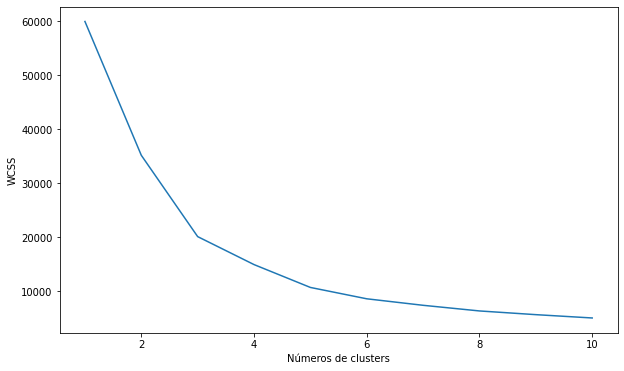

In [11]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss)
plt.xlabel('Números de clusters')
plt.ylabel('WCSS')
plt.show()

# 5 - Modelo e resultado

In [12]:
kmeans = KMeans(n_clusters=4, random_state=0)

In [13]:
previsoes = kmeans.fit_predict(X)

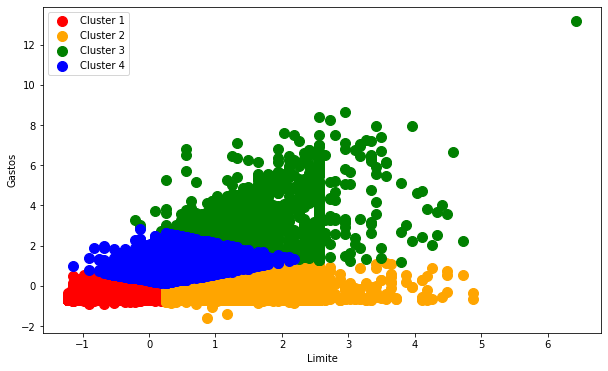

In [14]:
plt.figure(figsize=(10,6))
plt.scatter(X[previsoes == 0, 0], X[previsoes == 0, 1], s=100, c = 'red', label='Cluster 1')
plt.scatter(X[previsoes == 1, 0], X[previsoes == 1, 1], s=100, c = 'orange', label='Cluster 2')
plt.scatter(X[previsoes == 2, 0], X[previsoes == 2, 1], s=100, c = 'green', label='Cluster 3')
plt.scatter(X[previsoes == 3, 0], X[previsoes == 3, 1], s=100, c = 'blue', label='Cluster 4')
plt.xlabel('Limite')
plt.ylabel('Gastos')
plt.legend()
plt.show()